In [101]:
import paho.mqtt
import pandas as pd
import paho.mqtt.subscribe as subscribe
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'
tempDF = pd.read_json(url)
tempDF.to_csv('temperture.csv',index=False)

In [124]:
env = pd.read_json("environ_MS83200MS_nowind_3m-10min.json")
env["timestamp"] = pd.to_datetime(env["timestamp"], unit="ms")
env.set_index('timestamp',inplace=True)

In [125]:
df_res = env.resample("10min").last()

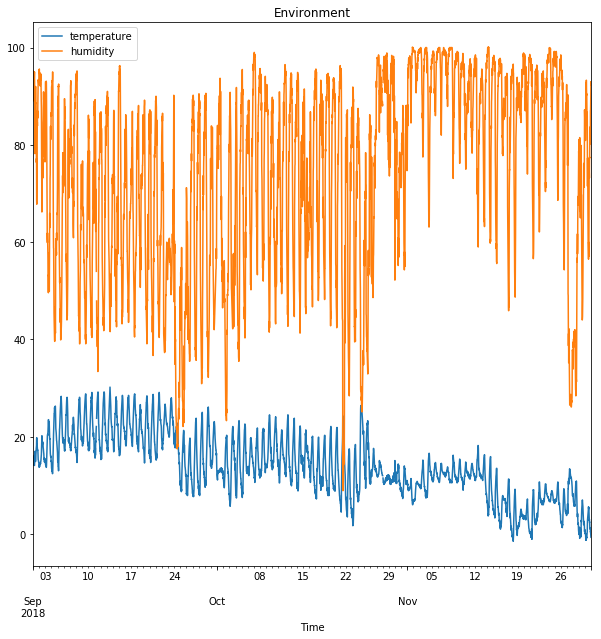

In [128]:
df_res[["temperature", "humidity"]].plot(title="Environment",figsize=(10, 10))
plt.xlabel("Time")
plt.show()

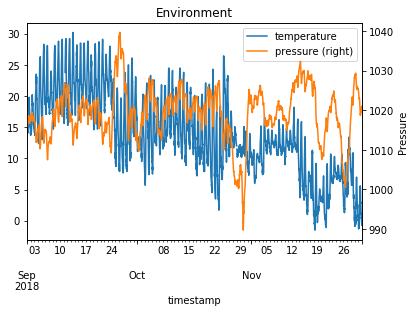

In [129]:
df_res[["temperature", "pressure"]].plot(title="Environment", secondary_y="pressure")
plt.ylabel('Temperature')
plt.ylabel('Pressure')
plt.show()

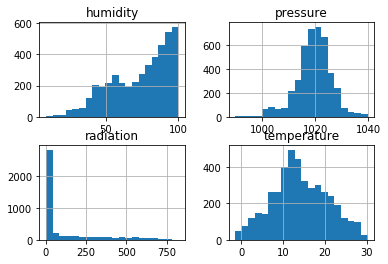

In [130]:
df_res[['humidity','pressure','radiation','temperature']].hist(bins=20)
plt.show()

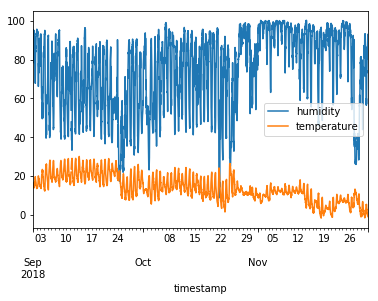

In [131]:
df_res[['humidity','temperature']].plot()

In [132]:
df_res.corr()

,humidity,precipitation,pressure,radiation,sunshine,temperature
humidity,1.000000,0.132111,-0.013153,-0.584736,-0.512599,-0.631180
precipitation,0.132111,1.000000,-0.268198,-0.069769,-0.050129,-0.048413
pressure,-0.013153,-0.268198,1.000000,0.027797,0.013642,-0.138207
radiation,-0.584736,-0.069769,0.027797,1.000000,0.744184,0.515989
sunshine,-0.512599,-0.050129,0.013642,0.744184,1.000000,0.533739
temperature,-0.631180,-0.048413,-0.138207,0.515989,0.533739,1.000000


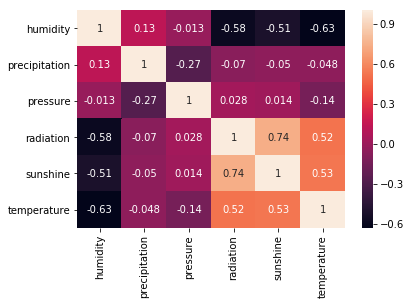

In [133]:
sns.heatmap(df_res.corr(),annot=True)

/home/abhay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/abhay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


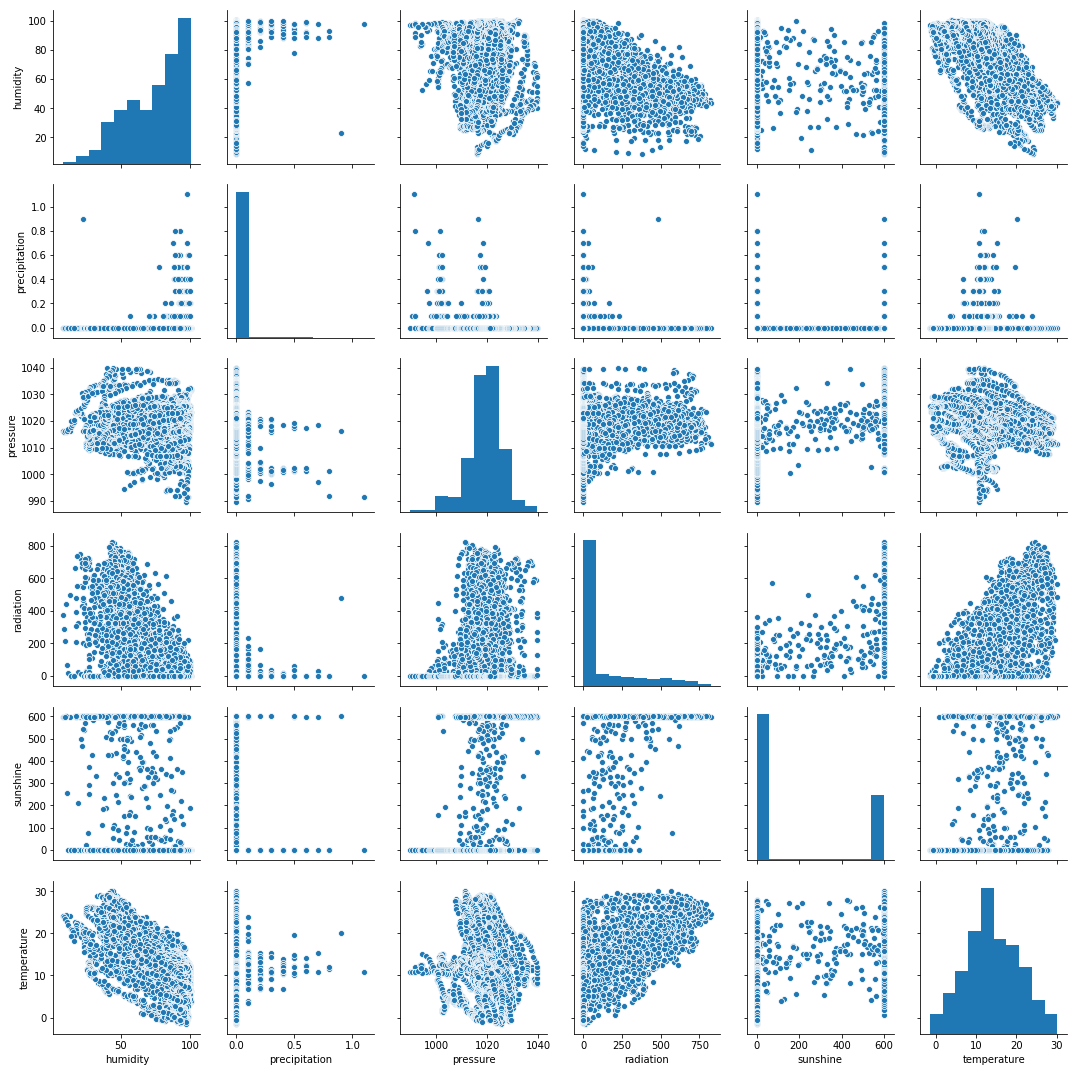

In [134]:
sns.pairplot(df_res)

In [136]:
temp_mean = df_res["temperature"].mean()
temp_std = df_res["temperature"].std()
df_res["mean"] = temp_mean
df_res["upper_limit"] = temp_mean + (temp_std * 3)
df_res["lower_limit"] = temp_mean - (temp_std * 3)
print(df_res.iloc[0]["upper_limit"])
print(df_res.iloc[0]["mean"])
print(df_res.iloc[0]["lower_limit"])

33.91954450718081
14.067615331650234
-5.784313843880341


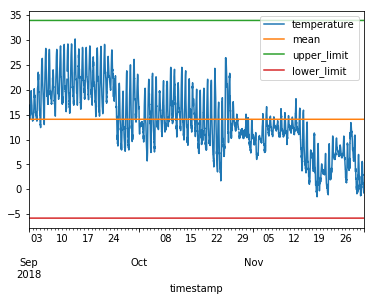

In [140]:
df_res[['temperature','mean','upper_limit','lower_limit']].plot()
plt.show()

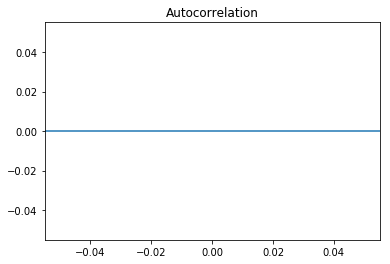

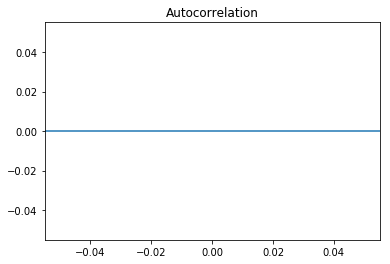

In [144]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(env['temperature'])

In [145]:
split_day = "2018-10-13"
train = df_res[:split_day]
test = df_res[split_day:]
print(train.iloc[0].name)
print(train.iloc[-1].name)
print(test.iloc[0].name)
print(test.iloc[-1].name)

2018-09-01 00:00:00
2018-10-13 23:30:00
2018-10-13 00:00:00
2018-11-30 23:00:00


In [147]:
X_train = train.drop("target", axis=1)
y_train = train["target"]
X_test = test.drop("target", axis=1)
y_test = test["target"]
print(X_train.shape)
print(y_train.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# Initialize Objects
sc = StandardScaler()
logreg = LogisticRegression()
# Create pipeline
pl = Pipeline([
("scale", sc),
("logreg", logreg)
])

pl.fit(X_train, y_train)
print(pl.predict(X_test))

In [ ]:
import pickle
with Path("pipeline_model.pkl").open("bw") as f:
    pickle.dump(pl, f)

In [ ]:
import pickle
with Path("pipeline_model.pkl").open('br') as f:
    pl = pickle.load(f)

In [ ]:
# # Uncomment below code if wants to process data into a continous stream

# cache = []
# def on_message(client, userdata, message):
#     data = json.loads(message.payload)
#     cache.append(data)
#     if len(cache) > MAX_CACHE:
#         with Path("data.txt").open("a") as f:
#             f.writelines(cache)
#         cache.clear()
#         df = pd.DataFrame.from_records([data],
#         index="timestamp",
#         columns=cols)
#         category = pl.predict(df)
#         maybe_alert(category[0])
    
# subscribe.callback(on_message,topics="toppics_name",hostname="hostName")